In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
from folium import plugins
from datetime import datetime
import datetime
import math

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
inspection = pd.read_csv("../input/chicago-food-inspections/food-inspections.csv")
inspection.head(6)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,2352683,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL,2670642.0,Restaurant,Risk 1 (High),1025 W ADDISON ST,CHICAGO,IL,60613.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':...",NaN,NaN,NaN,NaN,NaN
1,2352734,CHILI'S T-I,CHILI'S (T1-B14),34169.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666.0,...,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,42.008536,-87.914428,"{'latitude': '-87.91442843927047', 'longitude'...",NaN,NaN,NaN,NaN,NaN
2,2352713,NICK'S FIRE GRILL STEAK & LEMONADE INC.,NICK'S FIRE GRILL STEAK & LEMONADE INC.,2699090.0,NaN,Risk 1 (High),2900 W 63RD ST,CHICAGO,IL,60629.0,...,Not Ready,NaN,41.779190,-87.695892,"{'latitude': '-87.69589237398256', 'longitude'...",NaN,NaN,NaN,NaN,NaN
3,2352701,TAQUERIA BLUE LINE INC.,NaN,2703436.0,Restaurant,Risk 1 (High),3401 W BELMONT AVE,CHICAGO,IL,60618.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939168,-87.712546,"{'latitude': '-87.71254599117191', 'longitude'...",NaN,NaN,NaN,NaN,NaN
4,2352727,PORTAGE PARK DAY NURSERY,MOSAIC EARLY CHILDHOOD ACADEMY,2215815.0,Children's Services Facility,Risk 1 (High),5332-5334 W ADDISON ST,CHICAGO,IL,60641.0,...,Pass,NaN,41.946065,-87.760722,"{'latitude': '-87.76072227616888', 'longitude'...",NaN,NaN,NaN,NaN,NaN
5,2352738,AMARIT RESTAURANT,AMARIT RESTAURANT,1801618.0,Restaurant,Risk 1 (High),600 S DEARBORN ST,CHICAGO,IL,60605.0,...,Pass,NaN,41.874481,-87.629357,"{'latitude': '-87.62935653990546', 'longitude'...",NaN,NaN,NaN,NaN,NaN


In [3]:
inspection.tail(6)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
196819,67757,DUNKIN DONUTS/BASKIN-ROBBINS,DUNKIN DONUTS/BASKIN-ROBBINS,1380279.0,Restaurant,Risk 2 (Medium),100 W RANDOLPH ST,CHICAGO,IL,60601.0,...,Pass,NaN,41.884586,-87.631010,"{'latitude': '-87.63101044588599', 'longitude'...",NaN,NaN,NaN,NaN,NaN
196820,52234,Cafe 608,Cafe 608,2013328.0,Restaurant,Risk 1 (High),608 W BARRY AVE,CHICAGO,IL,60657.0,...,Pass,NaN,41.938007,-87.644755,"{'latitude': '-87.6447545707008', 'longitude':...",NaN,NaN,NaN,NaN,NaN
196821,104236,TEMPO CAFE,TEMPO CAFE,80916.0,Restaurant,Risk 1 (High),6 E CHESTNUT ST,CHICAGO,IL,60611.0,...,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.898431,-87.628009,"{'latitude': '-87.6280091630558', 'longitude':...",NaN,NaN,NaN,NaN,NaN
196822,67732,WOLCOTT'S,TROQUET,1992039.0,Restaurant,Risk 1 (High),1834 W MONTROSE AVE,CHICAGO,IL,60613.0,...,Pass,NaN,41.961606,-87.675967,"{'latitude': '-87.67596676683779', 'longitude'...",NaN,NaN,NaN,NaN,NaN
196823,70269,mr.daniel's,mr.daniel's,1899292.0,Restaurant,Risk 1 (High),5645 W BELMONT AVE,CHICAGO,IL,60634.0,...,Pass,NaN,41.938443,-87.768318,"{'latitude': '-87.76831838068422', 'longitude'...",NaN,NaN,NaN,NaN,NaN
196824,67738,MICHAEL'S ON MAIN CAFE,MICHAEL'S ON MAIN CAFE,2008948.0,Restaurant,Risk 1 (High),8750 W BRYN WAWR AVE,CHICAGO,IL,60631.0,...,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
inspection.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards'],
      dtype='object')

In [5]:
inspection.shape

(196825, 22)

In [6]:
inspection["Facility Type"].unique()

array(['Restaurant', nan, "Children's Services Facility", 'Grocery Store',
       'School', 'tavern', 'Shared Kitchen User (Long Term)',
       'Mobile Food Preparer', 'Liquor', 'HERBALIFE/ZUMBA', 'Catering',
       'PALETERIA', 'JUICE BAR/GROCERY', 'Bakery', 'TAVERN',
       'Daycare (2 - 6 Years)', 'Daycare Combo 1586', 'LIQUOR STORE',
       'Daycare Above and Under 2 Years', 'STORE', 'BANQUET',
       'REHAB CENTER', 'Long Term Care', 'HAIR SALON', 'GROCERY STORE',
       'Daycare (2 Years)', 'BREWERY', 'SCHOOL',
       'Daycare (Under 2 Years)', 'HERBALIFE', 'BUTCHER SHOP',
       '15 monts to 5 years old', 'MOBILE FOOD',
       'GAS STATION/CONVENIENCE STORE', 'Hospital',
       'CUSTOM POULTRY SLAUGHTER', 'GAS STATION/GROCERY', 'COFFEE SHOP',
       'HOSTEL', 'Pop-Up Food Establishment User-Tier II',
       'VENDING COMMISSARY', 'LIVE POULTRY', 'Shared Kitchen',
       'ICE CREAM', 'Pop-Up Establishment Host-Tier II', 'CHARTER SCHOOL',
       'Mobile Food Dispenser', 'CHILDRENS 

In [7]:
inspection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196825 entries, 0 to 196824
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Inspection ID               196825 non-null  int64  
 1   DBA Name                    196825 non-null  object 
 2   AKA Name                    194367 non-null  object 
 3   License #                   196808 non-null  float64
 4   Facility Type               192057 non-null  object 
 5   Risk                        196756 non-null  object 
 6   Address                     196825 non-null  object 
 7   City                        196686 non-null  object 
 8   State                       196783 non-null  object 
 9   Zip                         196775 non-null  float64
 10  Inspection Date             196825 non-null  object 
 11  Inspection Type             196824 non-null  object 
 12  Results                     196825 non-null  object 
 13  Violations    

From here, we can see that columns like Historical Wards, Zip Codes, Community Areas, Census Tracts, Wards are irrelevant (too many Null values)

Text(0.5, 1.0, 'Number of missing values for each column')

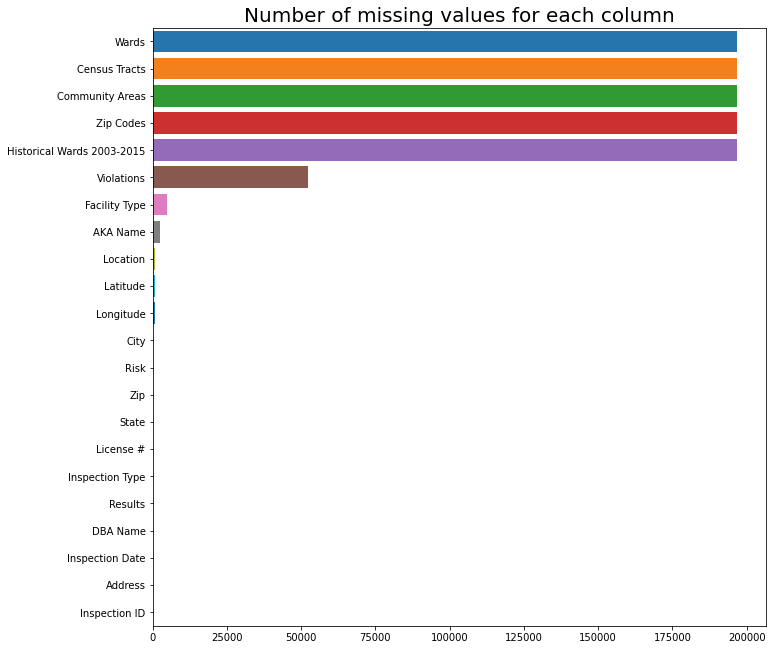

In [8]:
# Visualizing Missing values, Ranking in descending order
plt.figure(figsize=(11,11))
sns.barplot(x=inspection.isnull().sum().sort_values(ascending=False),y=inspection.isnull().sum().sort_values(ascending=False).index,
            palette = "tab10", saturation = 0.90, dodge = False)
plt.title("Number of missing values for each column",size=20)

In [9]:
# Counting missing values for Facility column
print("There are {0} missing values for Facility Type".format(len(inspection[inspection["Facility Type"].isna()])))

There are 4768 missing values for Facility Type


In [10]:
# Dropping unnecessary / irrelevant columns , which affects data quality and later data exploration 
inspection.drop(columns=['Historical Wards 2003-2015', 'Zip Codes','Community Areas', 'Census Tracts', 'Wards'])

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2352683,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL,2670642.0,Restaurant,Risk 1 (High),1025 W ADDISON ST,CHICAGO,IL,60613.0,2019-12-04T00:00:00.000,License Re-Inspection,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':..."
1,2352734,CHILI'S T-I,CHILI'S (T1-B14),34169.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666.0,2019-12-04T00:00:00.000,Canvass,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,42.008536,-87.914428,"{'latitude': '-87.91442843927047', 'longitude'..."
2,2352713,NICK'S FIRE GRILL STEAK & LEMONADE INC.,NICK'S FIRE GRILL STEAK & LEMONADE INC.,2699090.0,NaN,Risk 1 (High),2900 W 63RD ST,CHICAGO,IL,60629.0,2019-12-04T00:00:00.000,License,Not Ready,NaN,41.779190,-87.695892,"{'latitude': '-87.69589237398256', 'longitude'..."
3,2352701,TAQUERIA BLUE LINE INC.,NaN,2703436.0,Restaurant,Risk 1 (High),3401 W BELMONT AVE,CHICAGO,IL,60618.0,2019-12-04T00:00:00.000,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939168,-87.712546,"{'latitude': '-87.71254599117191', 'longitude'..."
4,2352727,PORTAGE PARK DAY NURSERY,MOSAIC EARLY CHILDHOOD ACADEMY,2215815.0,Children's Services Facility,Risk 1 (High),5332-5334 W ADDISON ST,CHICAGO,IL,60641.0,2019-12-04T00:00:00.000,Canvass,Pass,NaN,41.946065,-87.760722,"{'latitude': '-87.76072227616888', 'longitude'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196820,52234,Cafe 608,Cafe 608,2013328.0,Restaurant,Risk 1 (High),608 W BARRY AVE,CHICAGO,IL,60657.0,2010-01-04T00:00:00.000,License Re-Inspection,Pass,NaN,41.938007,-87.644755,"{'latitude': '-87.6447545707008', 'longitude':..."
196821,104236,TEMPO CAFE,TEMPO CAFE,80916.0,Restaurant,Risk 1 (High),6 E CHESTNUT ST,CHICAGO,IL,60611.0,2010-01-04T00:00:00.000,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.898431,-87.628009,"{'latitude': '-87.6280091630558', 'longitude':..."
196822,67732,WOLCOTT'S,TROQUET,1992039.0,Restaurant,Risk 1 (High),1834 W MONTROSE AVE,CHICAGO,IL,60613.0,2010-01-04T00:00:00.000,License Re-Inspection,Pass,NaN,41.961606,-87.675967,"{'latitude': '-87.67596676683779', 'longitude'..."
196823,70269,mr.daniel's,mr.daniel's,1899292.0,Restaurant,Risk 1 (High),5645 W BELMONT AVE,CHICAGO,IL,60634.0,2010-01-04T00:00:00.000,License Re-Inspection,Pass,NaN,41.938443,-87.768318,"{'latitude': '-87.76831838068422', 'longitude'..."


In [11]:
inspection = inspection.drop(columns=['Historical Wards 2003-2015', 'Zip Codes','Community Areas', 'Census Tracts', 'Wards'])
inspection.corr()

,Inspection ID,License #,Zip,Latitude,Longitude
Inspection ID,1.000000,0.237942,-0.001958,0.053298,-0.010155
License #,0.237942,1.000000,-0.006829,-0.003622,0.036524
Zip,-0.001958,-0.006829,1.000000,0.182637,-0.388989
Latitude,0.053298,-0.003622,0.182637,1.000000,-0.425613
Longitude,-0.010155,0.036524,-0.388989,-0.425613,1.000000


No real relationship / correlation between given variables

In [12]:
# Converting to DateTime format
inspection['Inspection Date'] = pd.to_datetime(inspection['Inspection Date'])

In [13]:
print('The first inspection occured on {0}, while the latest inspection occured on {1}'. 
format(inspection['Inspection Date'].min().strftime("%d.%m.%Y"), inspection['Inspection Date'].max().strftime("%d.%m.%Y.")))

The first inspection occured on 04.01.2010, while the latest inspection occured on 04.12.2019.


In [14]:
print(f"Based on DBA Name, there are {inspection['DBA Name'].nunique()} distinct names of restaurants")

Based on DBA Name, there are 27621 distinct names of restaurants


In [15]:
print(f"Based on Licenses, there are {inspection['License #'].nunique()} distinct restaurants")

Based on Licenses, there are 37464 distinct restaurants


In [16]:
# Creating new columns: year, month, and day columns
inspection['Year'] = pd.DatetimeIndex(inspection['Inspection Date']).year
inspection['Month'] = pd.DatetimeIndex(inspection['Inspection Date']).month
inspection['Day'] = pd.DatetimeIndex(inspection['Inspection Date']).day

inspection

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Year,Month,Day
0,2352683,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL,2670642.0,Restaurant,Risk 1 (High),1025 W ADDISON ST,CHICAGO,IL,60613.0,2019-12-04,License Re-Inspection,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':...",2019,12,4
1,2352734,CHILI'S T-I,CHILI'S (T1-B14),34169.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666.0,2019-12-04,Canvass,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,42.008536,-87.914428,"{'latitude': '-87.91442843927047', 'longitude'...",2019,12,4
2,2352713,NICK'S FIRE GRILL STEAK & LEMONADE INC.,NICK'S FIRE GRILL STEAK & LEMONADE INC.,2699090.0,NaN,Risk 1 (High),2900 W 63RD ST,CHICAGO,IL,60629.0,2019-12-04,License,Not Ready,NaN,41.779190,-87.695892,"{'latitude': '-87.69589237398256', 'longitude'...",2019,12,4
3,2352701,TAQUERIA BLUE LINE INC.,NaN,2703436.0,Restaurant,Risk 1 (High),3401 W BELMONT AVE,CHICAGO,IL,60618.0,2019-12-04,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939168,-87.712546,"{'latitude': '-87.71254599117191', 'longitude'...",2019,12,4
4,2352727,PORTAGE PARK DAY NURSERY,MOSAIC EARLY CHILDHOOD ACADEMY,2215815.0,Children's Services Facility,Risk 1 (High),5332-5334 W ADDISON ST,CHICAGO,IL,60641.0,2019-12-04,Canvass,Pass,NaN,41.946065,-87.760722,"{'latitude': '-87.76072227616888', 'longitude'...",2019,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196820,52234,Cafe 608,Cafe 608,2013328.0,Restaurant,Risk 1 (High),608 W BARRY AVE,CHICAGO,IL,60657.0,2010-01-04,License Re-Inspection,Pass,NaN,41.938007,-87.644755,"{'latitude': '-87.6447545707008', 'longitude':...",2010,1,4
196821,104236,TEMPO CAFE,TEMPO CAFE,80916.0,Restaurant,Risk 1 (High),6 E CHESTNUT ST,CHICAGO,IL,60611.0,2010-01-04,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.898431,-87.628009,"{'latitude': '-87.6280091630558', 'longitude':...",2010,1,4
196822,67732,WOLCOTT'S,TROQUET,1992039.0,Restaurant,Risk 1 (High),1834 W MONTROSE AVE,CHICAGO,IL,60613.0,2010-01-04,License Re-Inspection,Pass,NaN,41.961606,-87.675967,"{'latitude': '-87.67596676683779', 'longitude'...",2010,1,4
196823,70269,mr.daniel's,mr.daniel's,1899292.0,Restaurant,Risk 1 (High),5645 W BELMONT AVE,CHICAGO,IL,60634.0,2010-01-04,License Re-Inspection,Pass,NaN,41.938443,-87.768318,"{'latitude': '-87.76831838068422', 'longitude'...",2010,1,4


<AxesSubplot:xlabel='Year', ylabel='count'>

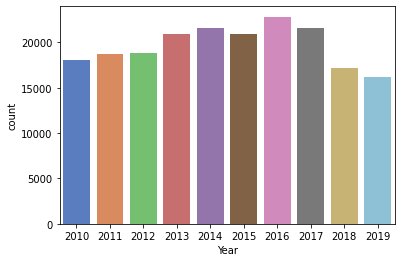

In [17]:
sns.countplot(data = inspection, x = 'Year', palette= 'muted')

<AxesSubplot:xlabel='Month', ylabel='count'>

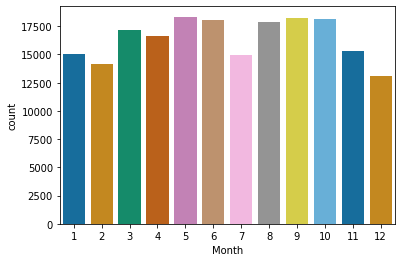

In [18]:
sns.countplot(data = inspection, x = 'Month', palette= 'colorblind')

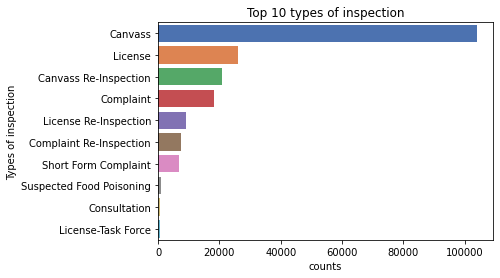

In [19]:
# The top 10 inspection types
sns.barplot(x=inspection['Inspection Type'].value_counts()[:10],y=inspection['Inspection Type'].value_counts()[:10].index,
            saturation = 1.0, palette = 'deep')
plt.title('Top 10 types of inspection')
plt.xlabel('counts')
plt.ylabel('Types of inspection')
plt.show()

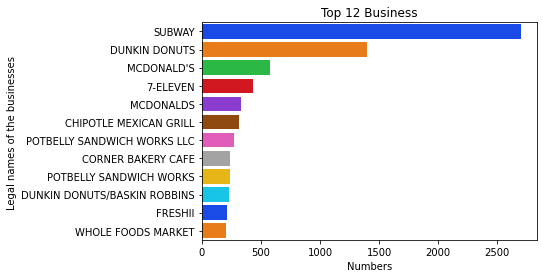

In [20]:
# The top 12 businesses
sns.barplot(x=inspection['DBA Name'].value_counts()[:12],y=inspection['DBA Name'].value_counts()[:12].index,
            saturation = 0.8, dodge = False, palette = 'bright')
plt.title('Top 12 Business')
plt.xlabel('Numbers')
plt.ylabel('Legal names of the businesses ')
plt.show()

The most popular business is Subway :)

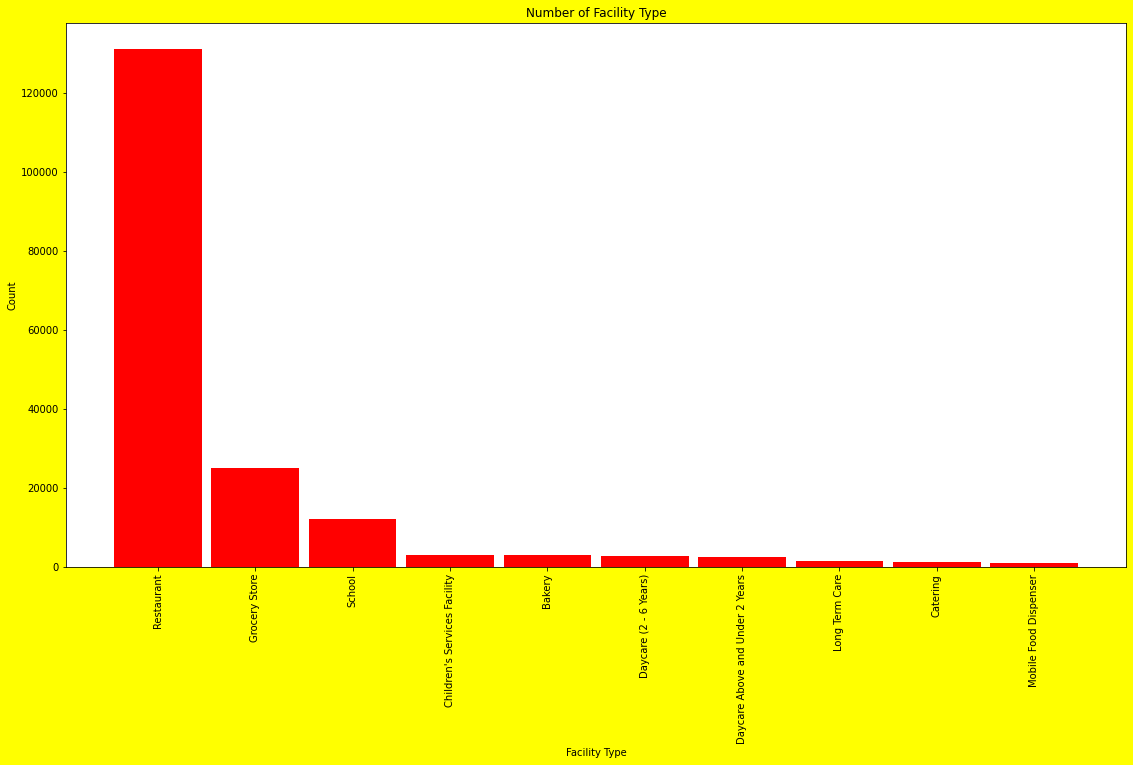

In [21]:
# visualizing the number of facility types
x = inspection['Facility Type'].value_counts().index.values.astype('str')[:10]
y = inspection['Facility Type'].value_counts().values[:10]
plt.figure(figsize = (19,10), facecolor = 'yellow', edgecolor = 'black')
plt.bar(x,y,width = 0.9, color = 'red')
plt.xticks(rotation = 'vertical')
plt.xlabel("Facility Type")
plt.ylabel("Count")
plt.title("Number of Facility Type")
plt.show()

The most popular facility type from the given dataset is restaurant

<AxesSubplot:xlabel='Risk', ylabel='count'>

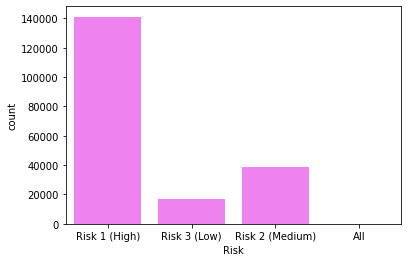

In [22]:
sns.countplot(data = inspection, color = "Violet", x = 'Risk', saturation = 1.0, dodge = False)

From the figure, we can see that Risk 1 (High) occupies most, then Risk 2 (Medium), then Risk 3 (Low)

In [23]:
# Types of risks with there count.
inspection['Risk'].value_counts()

Risk 1 (High)      141129
Risk 2 (Medium)     38431
Risk 3 (Low)        17165
All                    31
Name: Risk, dtype: int64

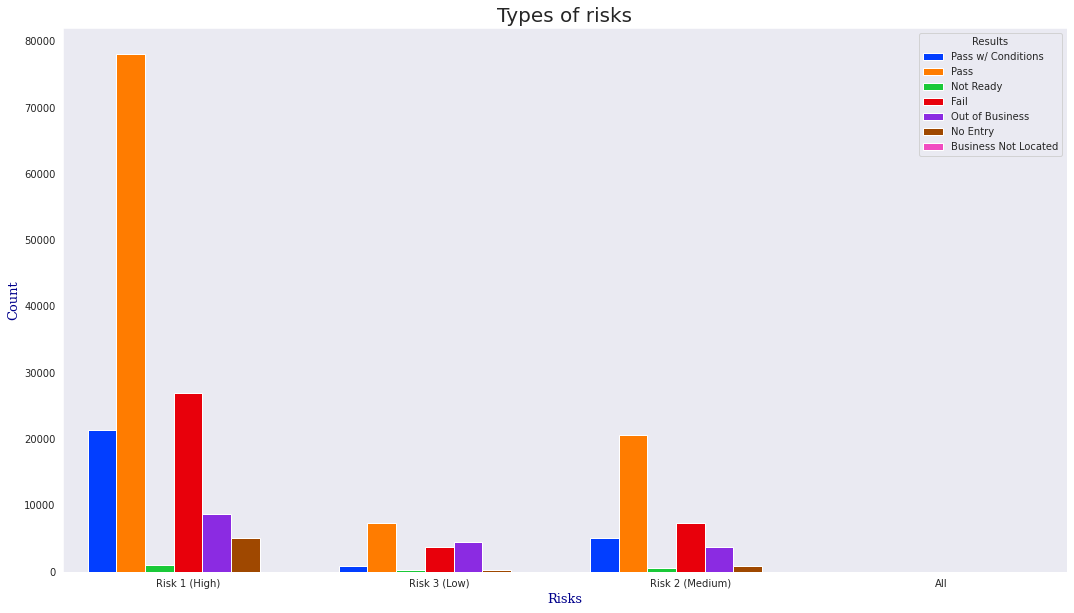

In [24]:
# Detailed information on risk types
plt.figure(figsize=(18,10))
sns.set_style("dark")
font1 = {'family':'serif','color':'darkblue','size': 20}
font2 = {'family':'serif','color':'darkblue','size': 20}
fig=sns.countplot(x="Risk", data=inspection, palette = 'bright', saturation = 1.0, hue='Results')
plt.title('Types of risks', family = 'fantasy', fontsize = 20)
plt.xlabel("Risks", fontsize=13, fontdict = font1)
plt.ylabel("Count", fontsize=13, fontdict = font2)
plt.show()

The most popular result for risk type 1 (High) is: Pass

<Figure size 1080x720 with 0 Axes>

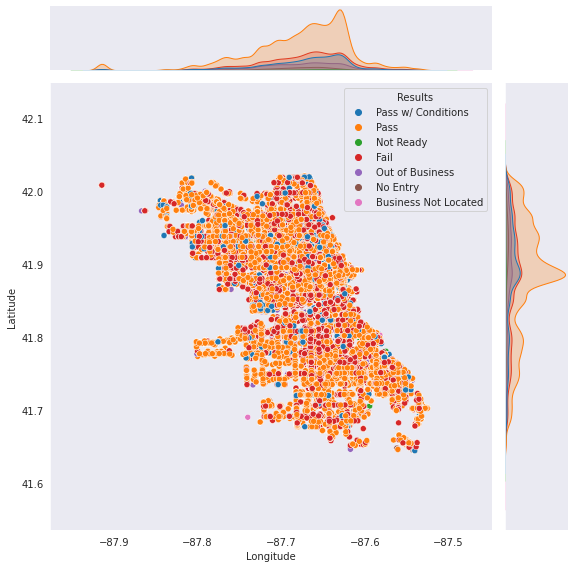

In [25]:
plt.figure(figsize=(15,10), facecolor ='green', frameon=False)
sns.set_style("dark")
sns.jointplot(y="Latitude", x="Longitude", height = 8, ratio = 6, color = 'k', data=inspection, hue='Results')
plt.show()

Pass (Result) is distributed widely and spread almost the map.

<Figure size 1080x720 with 0 Axes>

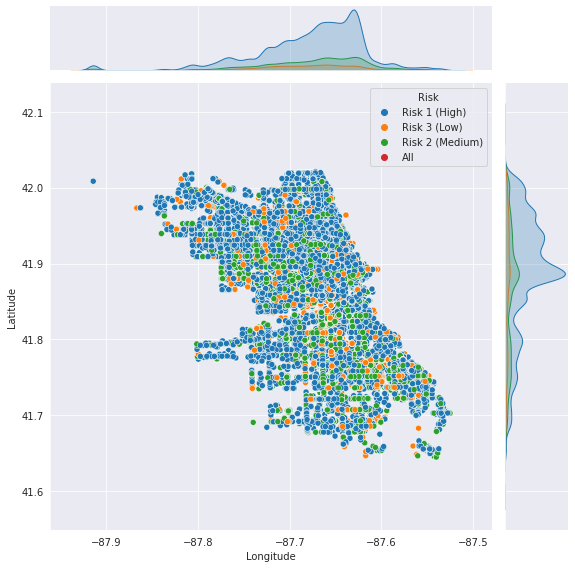

In [26]:
plt.figure(figsize=(15,10), facecolor= 'blue', frameon=False)
sns.set_style("darkgrid")
sns.jointplot(y="Latitude", x="Longitude", height = 8, ratio = 6, color = 'k', data=inspection, hue='Risk')
plt.show()

Risk 1 (High) is distributed widely, significantly more than the other 2 types of risk.

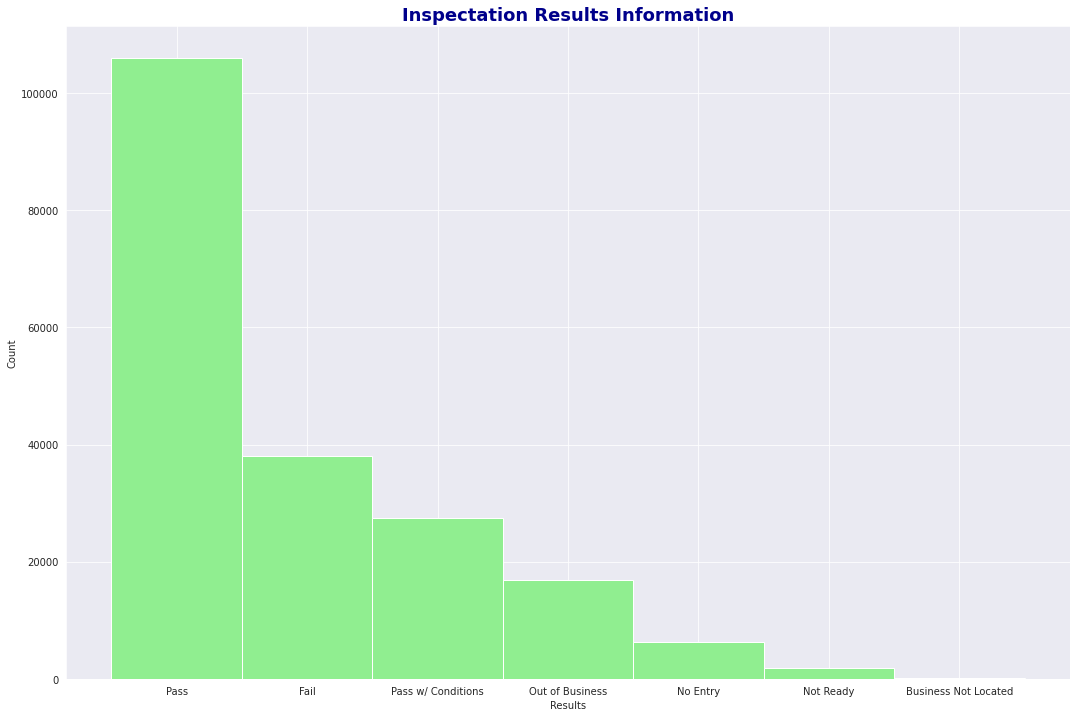

In [27]:
# Infomartion about the inspection results
x = inspection['Results'].value_counts().index.values.astype('str')
y = inspection['Results'].value_counts().values
font0 = {'family': 'Times New Roman',
        'color':  'darkblue',
        'weight': 'semibold',
        'size': 18,
        }
plt.figure(figsize = (18,12))
plt.bar(x,y, width = 1.0, color = 'lightgreen')
plt.xticks(rotation = 'horizontal')
plt.xlabel("Results")
plt.ylabel("Count")
plt.title("Inspectation Results Information", fontdict = font0)
plt.show()

The most popular result is Pass !

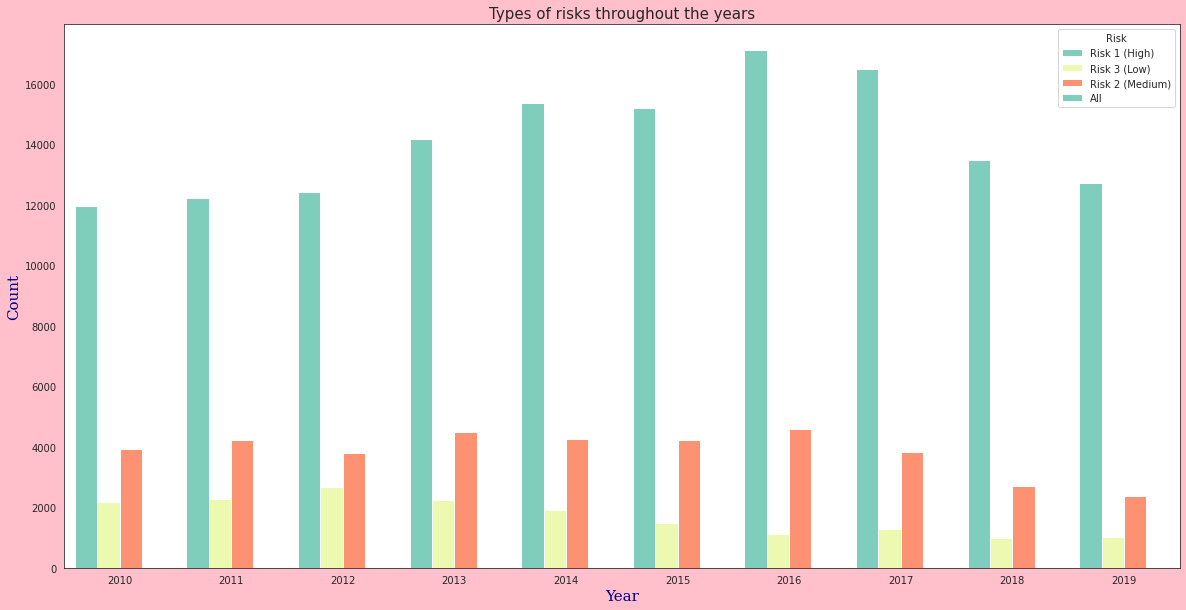

In [28]:
# Types of risks yearly
plt.figure(figsize=(20,10), facecolor = 'pink')
sns.set_style("white")

font1 = {'family':'serif','color':'darkblue','size': 20}
font2 = {'family':'serif','color':'darkblue','size': 20}
fig=sns.countplot(x="Year", data=inspection,saturation= 1.0, palette= ["#7fcdbb", "#edf8b1", "#fc9272"], hue='Risk')
plt.title('Types of risks throughout the years', fontsize=15)
plt.xlabel("Year", fontsize=15, fontdict = font1)
plt.ylabel("Count", fontsize=15, fontdict = font2)
plt.show()

During the period of 2010 to 2019, Risk 1 (High) is always the highest in any year.

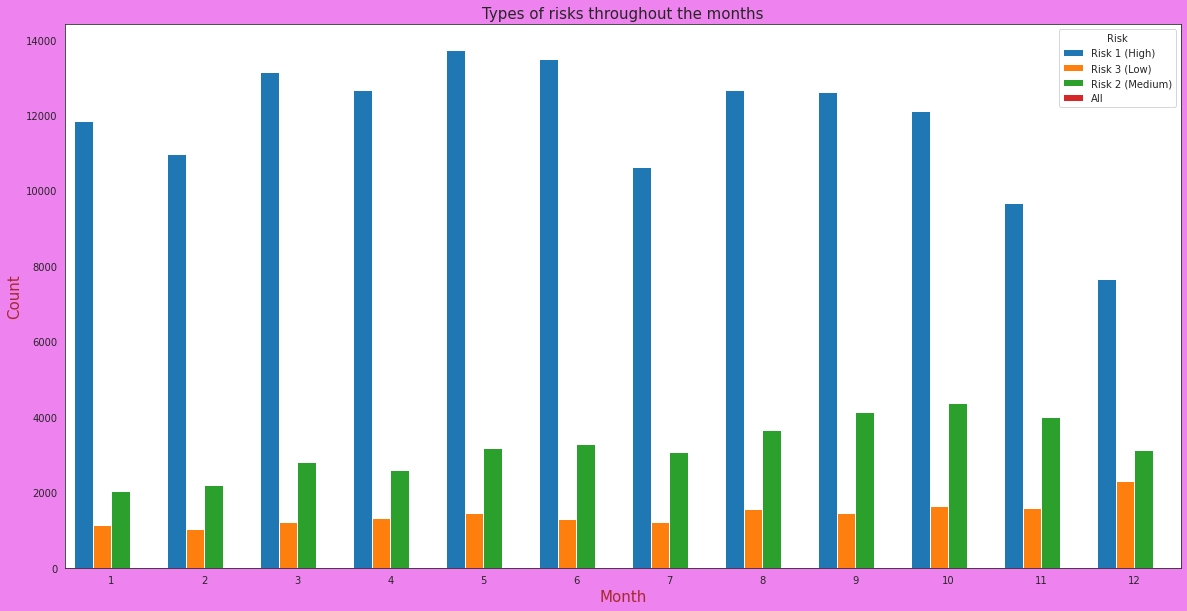

In [29]:
# Types of risks yearly
plt.figure(figsize=(20,10), facecolor = 'violet')
sns.set_style("white")

font1 = {'family':'fantasy','color':'brown','size': 20}
font2 = {'family':'fantasy','color':'brown','size': 20}
fig=sns.countplot(x="Month", data=inspection,saturation= 1.0, hue='Risk')
plt.title('Types of risks throughout the months', fontsize=15)
plt.xlabel("Month", fontsize=15, fontdict = font1)
plt.ylabel("Count", fontsize=15, fontdict = font2)
plt.show()

In [30]:
# Checking Risk 1 Type (High) information
data_risk1= inspection[inspection.Risk=='Risk 1 (High)']
data_risk1.head(7)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Year,Month,Day
0,2352683,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL,2670642.0,Restaurant,Risk 1 (High),1025 W ADDISON ST,CHICAGO,IL,60613.0,2019-12-04,License Re-Inspection,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':...",2019,12,4
1,2352734,CHILI'S T-I,CHILI'S (T1-B14),34169.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666.0,2019-12-04,Canvass,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,42.008536,-87.914428,"{'latitude': '-87.91442843927047', 'longitude'...",2019,12,4
2,2352713,NICK'S FIRE GRILL STEAK & LEMONADE INC.,NICK'S FIRE GRILL STEAK & LEMONADE INC.,2699090.0,NaN,Risk 1 (High),2900 W 63RD ST,CHICAGO,IL,60629.0,2019-12-04,License,Not Ready,NaN,41.779190,-87.695892,"{'latitude': '-87.69589237398256', 'longitude'...",2019,12,4
3,2352701,TAQUERIA BLUE LINE INC.,NaN,2703436.0,Restaurant,Risk 1 (High),3401 W BELMONT AVE,CHICAGO,IL,60618.0,2019-12-04,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939168,-87.712546,"{'latitude': '-87.71254599117191', 'longitude'...",2019,12,4
4,2352727,PORTAGE PARK DAY NURSERY,MOSAIC EARLY CHILDHOOD ACADEMY,2215815.0,Children's Services Facility,Risk 1 (High),5332-5334 W ADDISON ST,CHICAGO,IL,60641.0,2019-12-04,Canvass,Pass,NaN,41.946065,-87.760722,"{'latitude': '-87.76072227616888', 'longitude'...",2019,12,4
5,2352738,AMARIT RESTAURANT,AMARIT RESTAURANT,1801618.0,Restaurant,Risk 1 (High),600 S DEARBORN ST,CHICAGO,IL,60605.0,2019-12-04,Canvass Re-Inspection,Pass,NaN,41.874481,-87.629357,"{'latitude': '-87.62935653990546', 'longitude'...",2019,12,4
6,2352684,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL,2670643.0,Restaurant,Risk 1 (High),1025 W ADDISON ST,CHICAGO,IL,60613.0,2019-12-04,License Re-Inspection,Pass w/ Conditions,NaN,41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':...",2019,12,4


In [31]:
import math 
# Visualizing the distribution of restaurants and other establishments in the City of Chicago
# converting to List Type
lats = inspection['Latitude'].tolist()
# Dropping Naan Values
new_list_lats = [x for x in lats if math.isnan(x) == False]
lons = inspection['Longitude'].tolist()
# Dropping Naan Values
new_list_lons = [y for y in lons if math.isnan(y) == False]
locations = list(zip(new_list_lats, new_list_lons))
# Utlizing Map () function !
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
FastMarkerCluster(data=locations).add_to(map1)


In [32]:
import statistics
# visualizing the distribution of risk 1 type (High) through the interative map with geospatial data
inspection_risk1=inspection[inspection.Risk=='Risk 1 (High)']
lats = inspection_risk1['Latitude'].tolist()
new_list_lats = [x for x in lats if math.isnan(x) == False]
lons = inspection_risk1['Longitude'].tolist()
new_list_lons = [y for y in lons if math.isnan(y) == False]
locations = list(zip(new_list_lats, new_list_lons))
# importing statistics to calculate the mean of lattitude as well as longitude 
map1 = folium.Map(location=[statistics.mean(new_list_lats),statistics.mean(new_list_lons)], radius=50, zoom_start=5)
FastMarkerCluster(data=locations, overlay = False).add_to(map1)

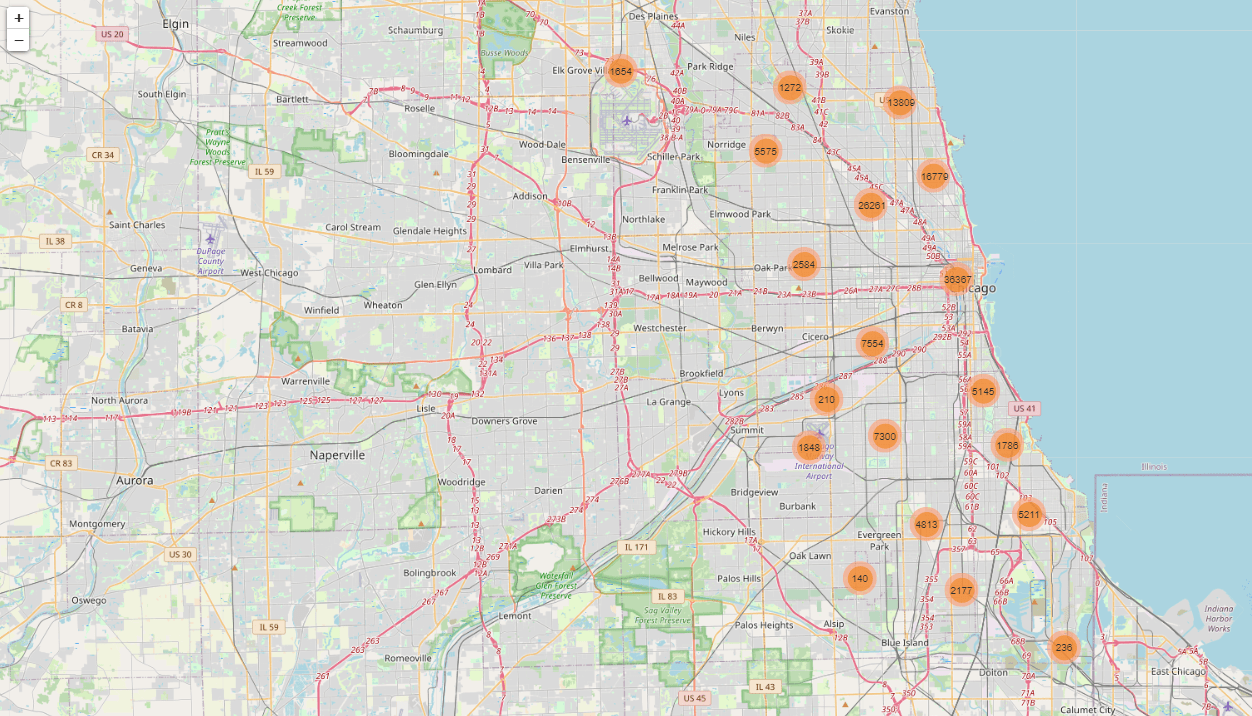